In [1]:
library(knitr)
library(dplyr)
library(Seurat)
library(reticulate)
library(scales)
library(DT)
set.seed(1234)
options(repr.plot.width=14, repr.plot.height=10)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘DT’


The following object is masked from ‘package:Seurat’:

    JS




In [2]:
arg01 <- "mca" #library name: tenx, dropseq, mca
arg02 <- "all_samples_normalized_readcounts.txt" #10X directory, dropseq / mca count matrix
arg03 <- "ex3_analysis" #project name
arg04 <- "ex3.rds"  #output file name for saveRDS function

In [3]:
switch(arg01,
    "tenx" = tmp.data <- Read10X(data.dir = arg02),
    "dropseq" = tmp.data <- read.table(arg02, sep = "\t", header=T, row.names=1),
    "mca" = tmp.data <- read.table(arg02, sep = "\t", header=T, row.names=1),
    print("You have chosen undefined library parameter"))
tmp <- CreateSeuratObject(counts = tmp.data, project = arg03, min.cells = 3)
print(tmp)

An object of class Seurat 
24213 features across 1353 samples within 1 assay 
Active assay: RNA (24213 features, 0 variable features)


Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of percent.mt.”
Warning message in cor(x = data[, 1], y = data[, 2]):
“ 標準偏差が 0 です ”
Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


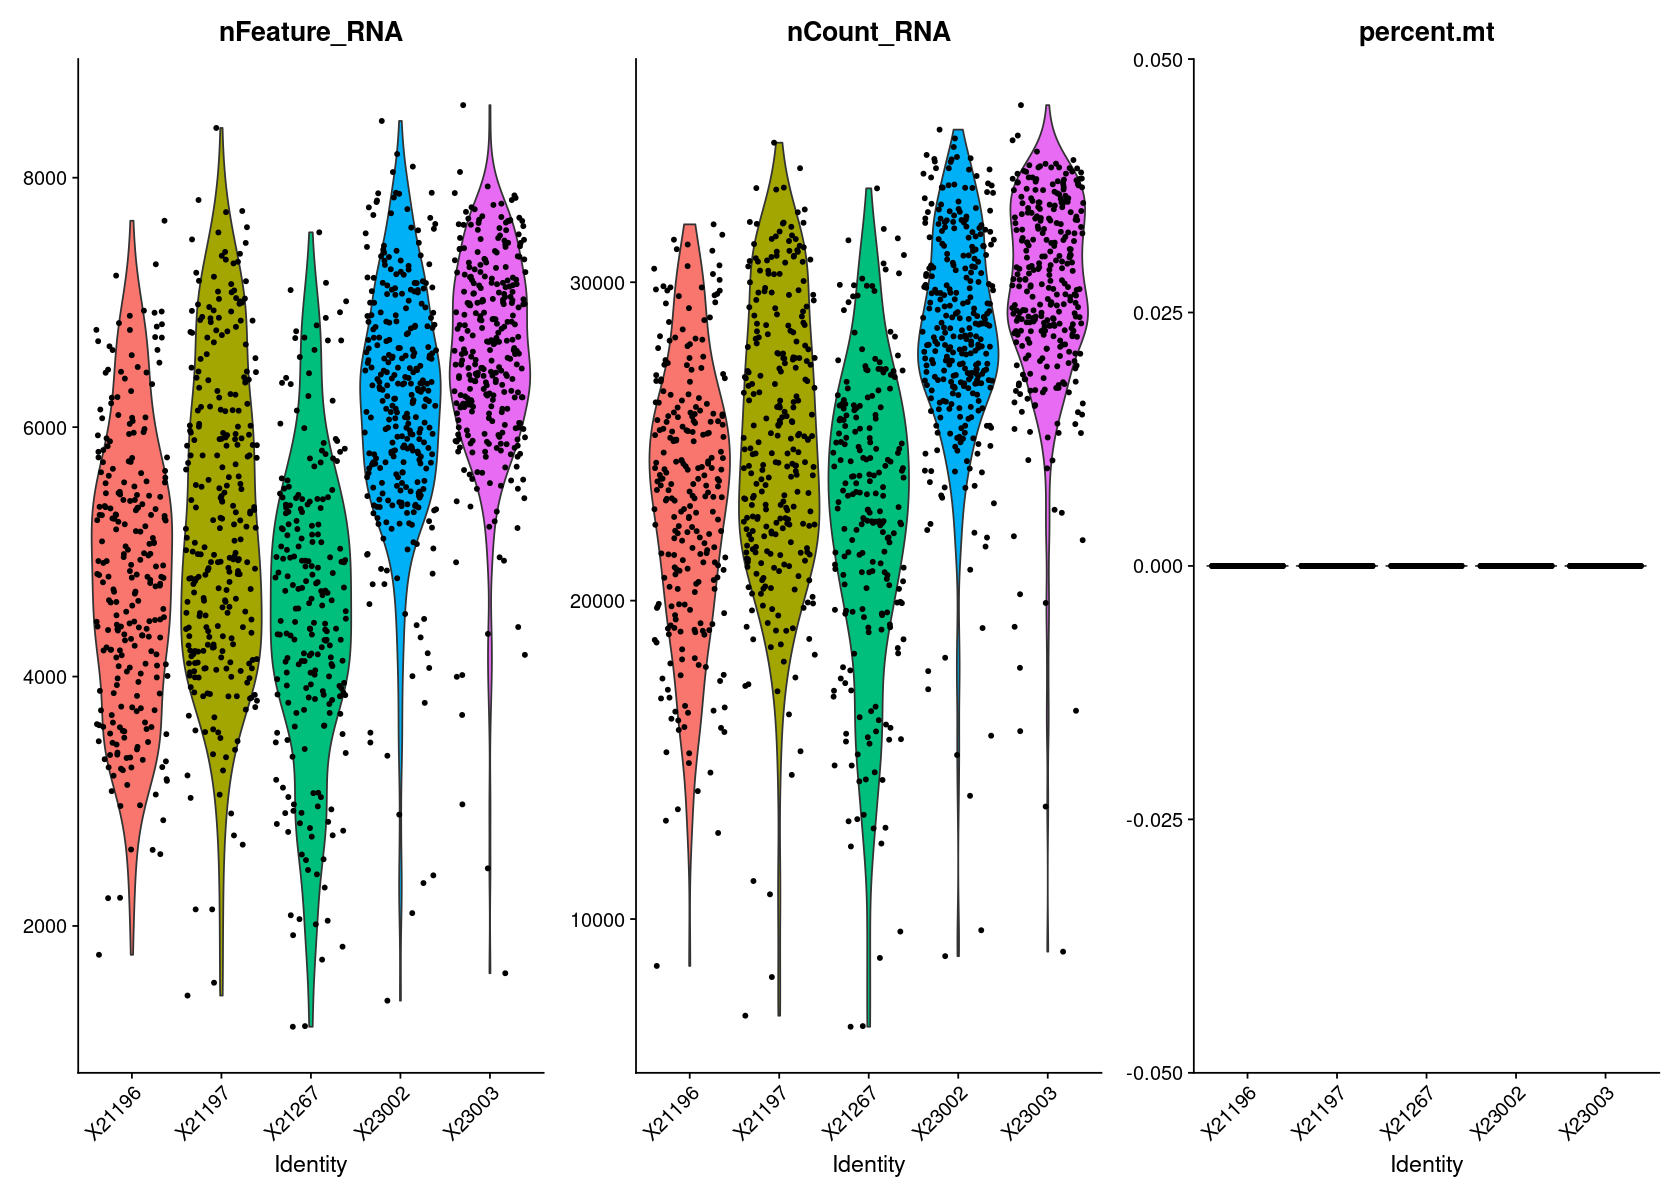

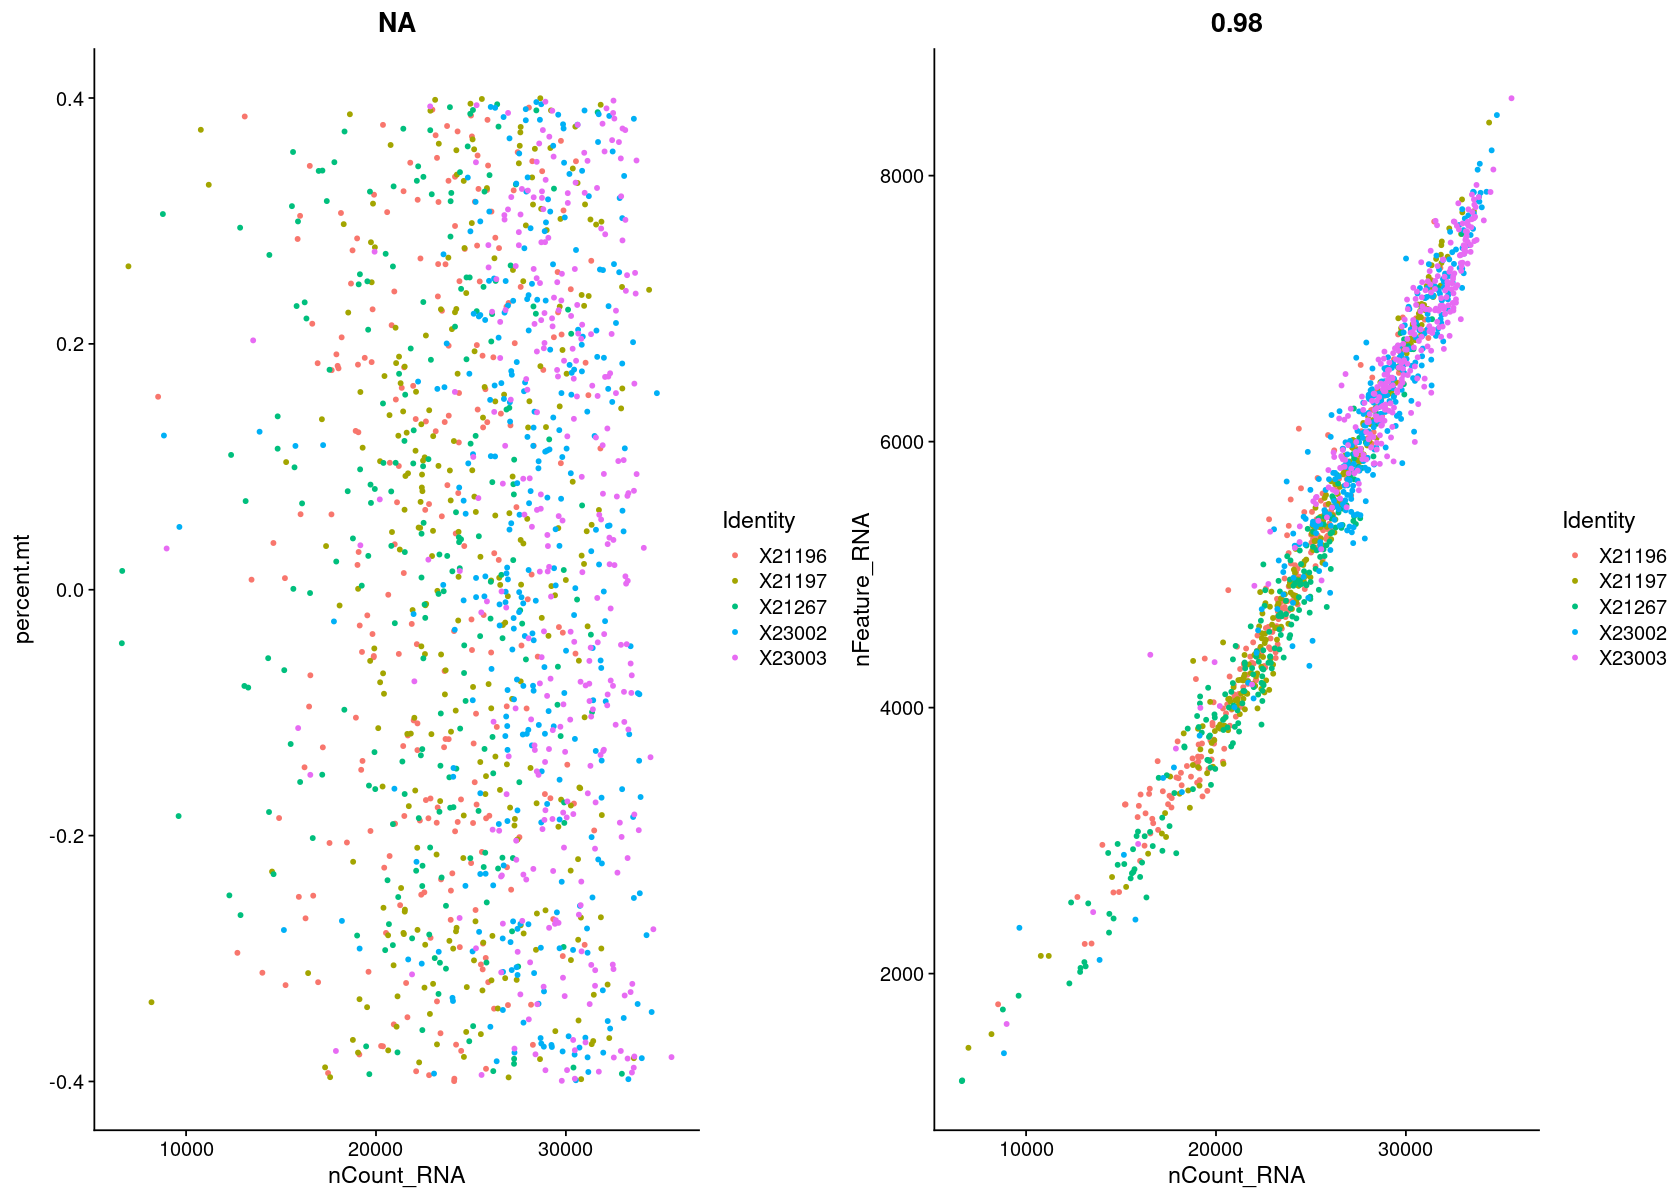

In [5]:
tmp[["percent.mt"]] <- PercentageFeatureSet(tmp, pattern="^mt-")
VlnPlot(tmp, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

plot1 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

In [18]:
arg05 <- 10 #nFeature_RNA_min
arg06 <- 7500 #nFeature_RNA_max
arg07 <- 0 #nCount_RNA_min
arg08 <- 100000 #nCount_RNA_max
arg09 <- 50 #percent.mt_max

An object of class Seurat 
20472 features across 2183 samples within 1 assay 
Active assay: RNA (20472 features)


pdf 
  2

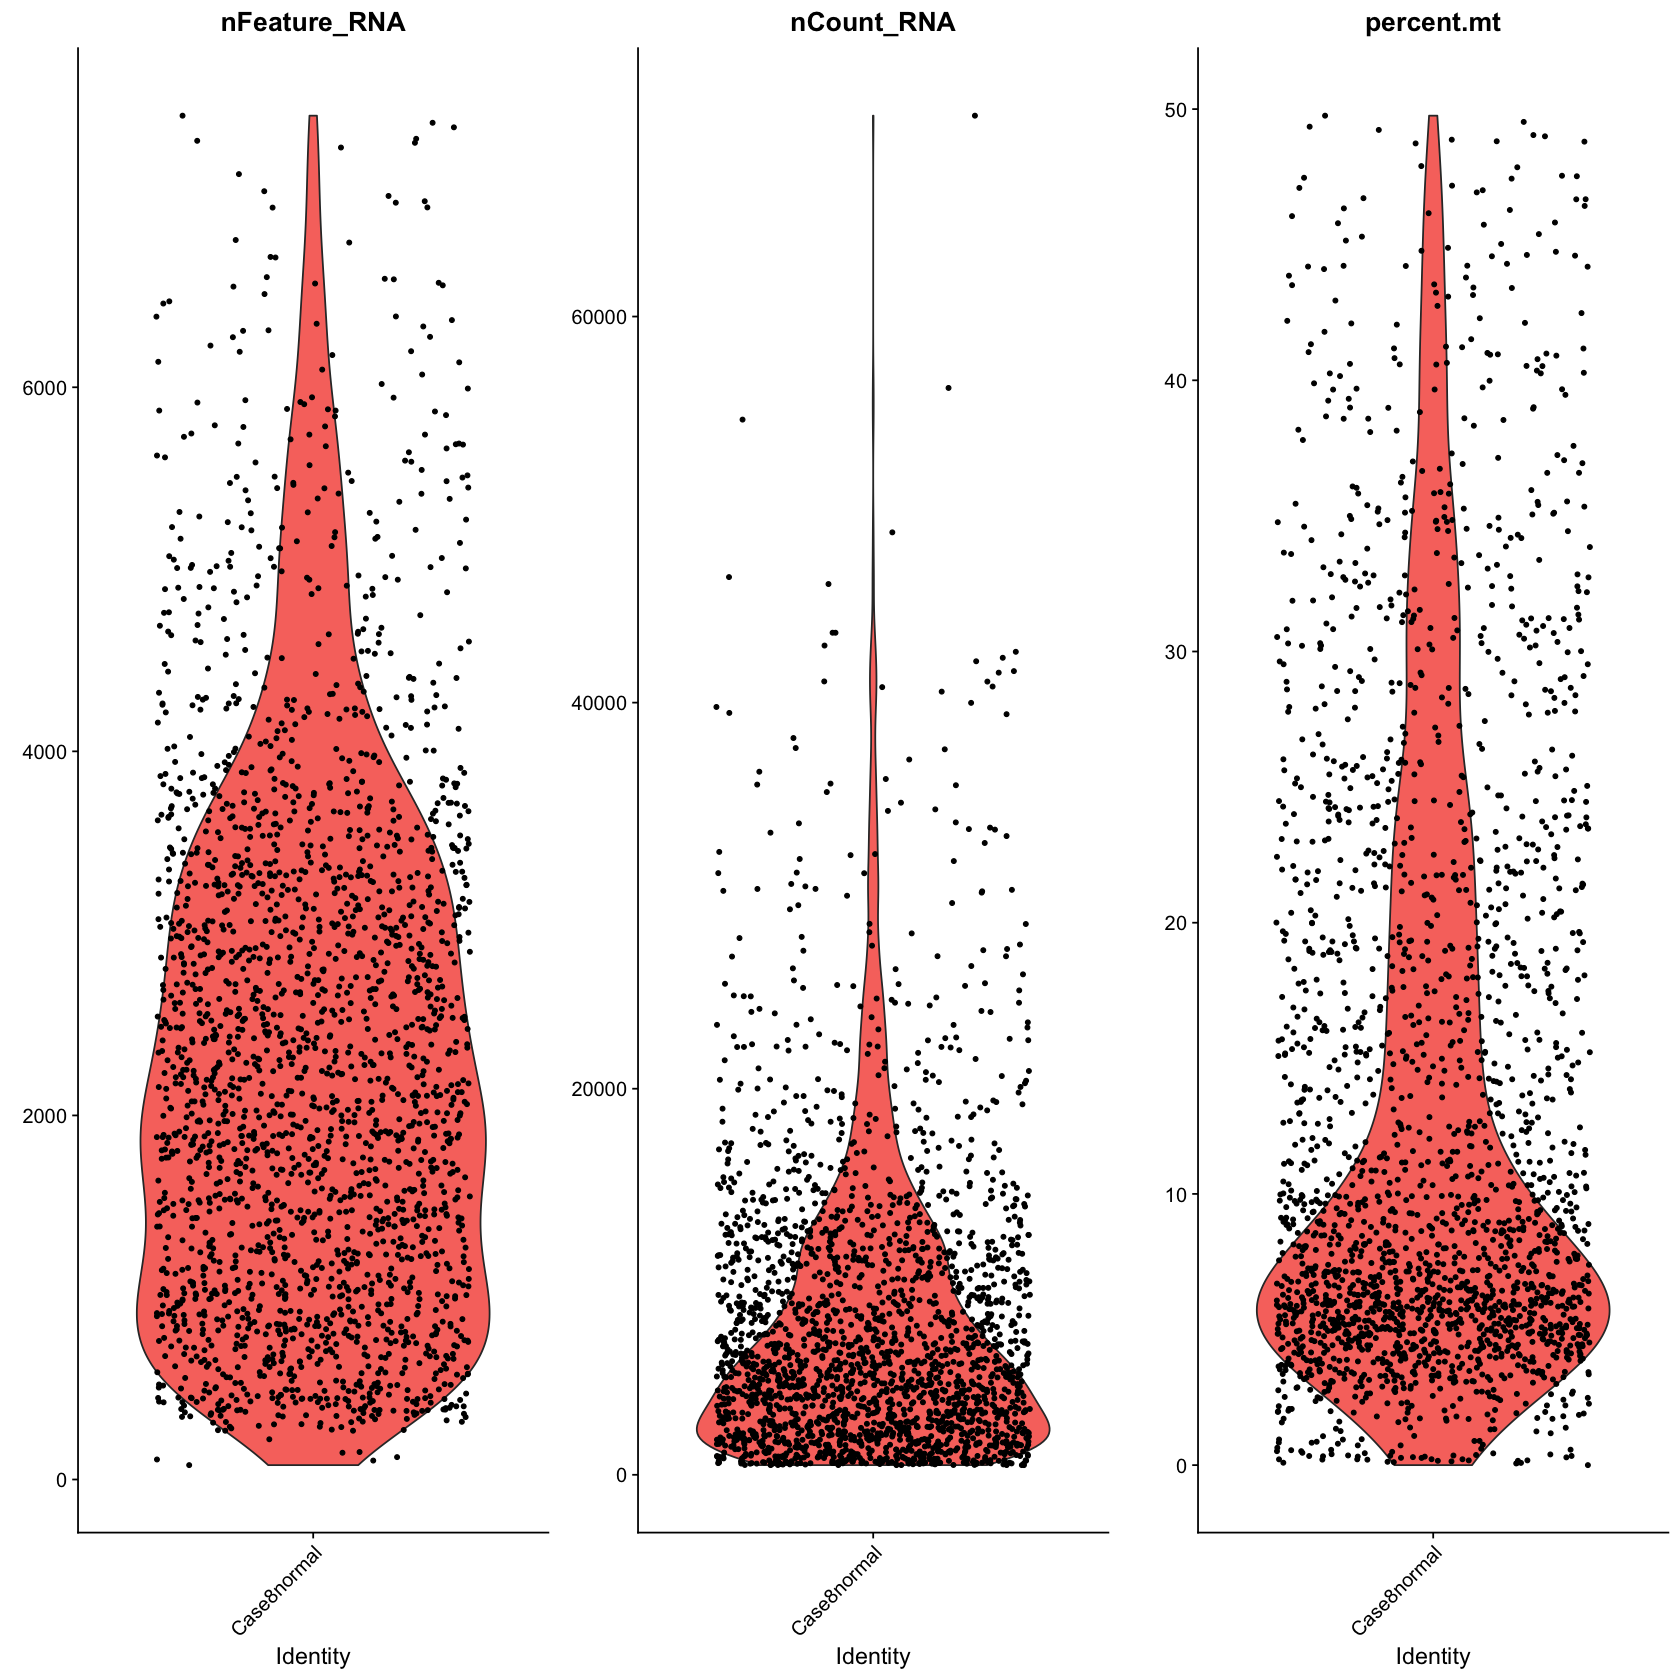

pdf 
  2

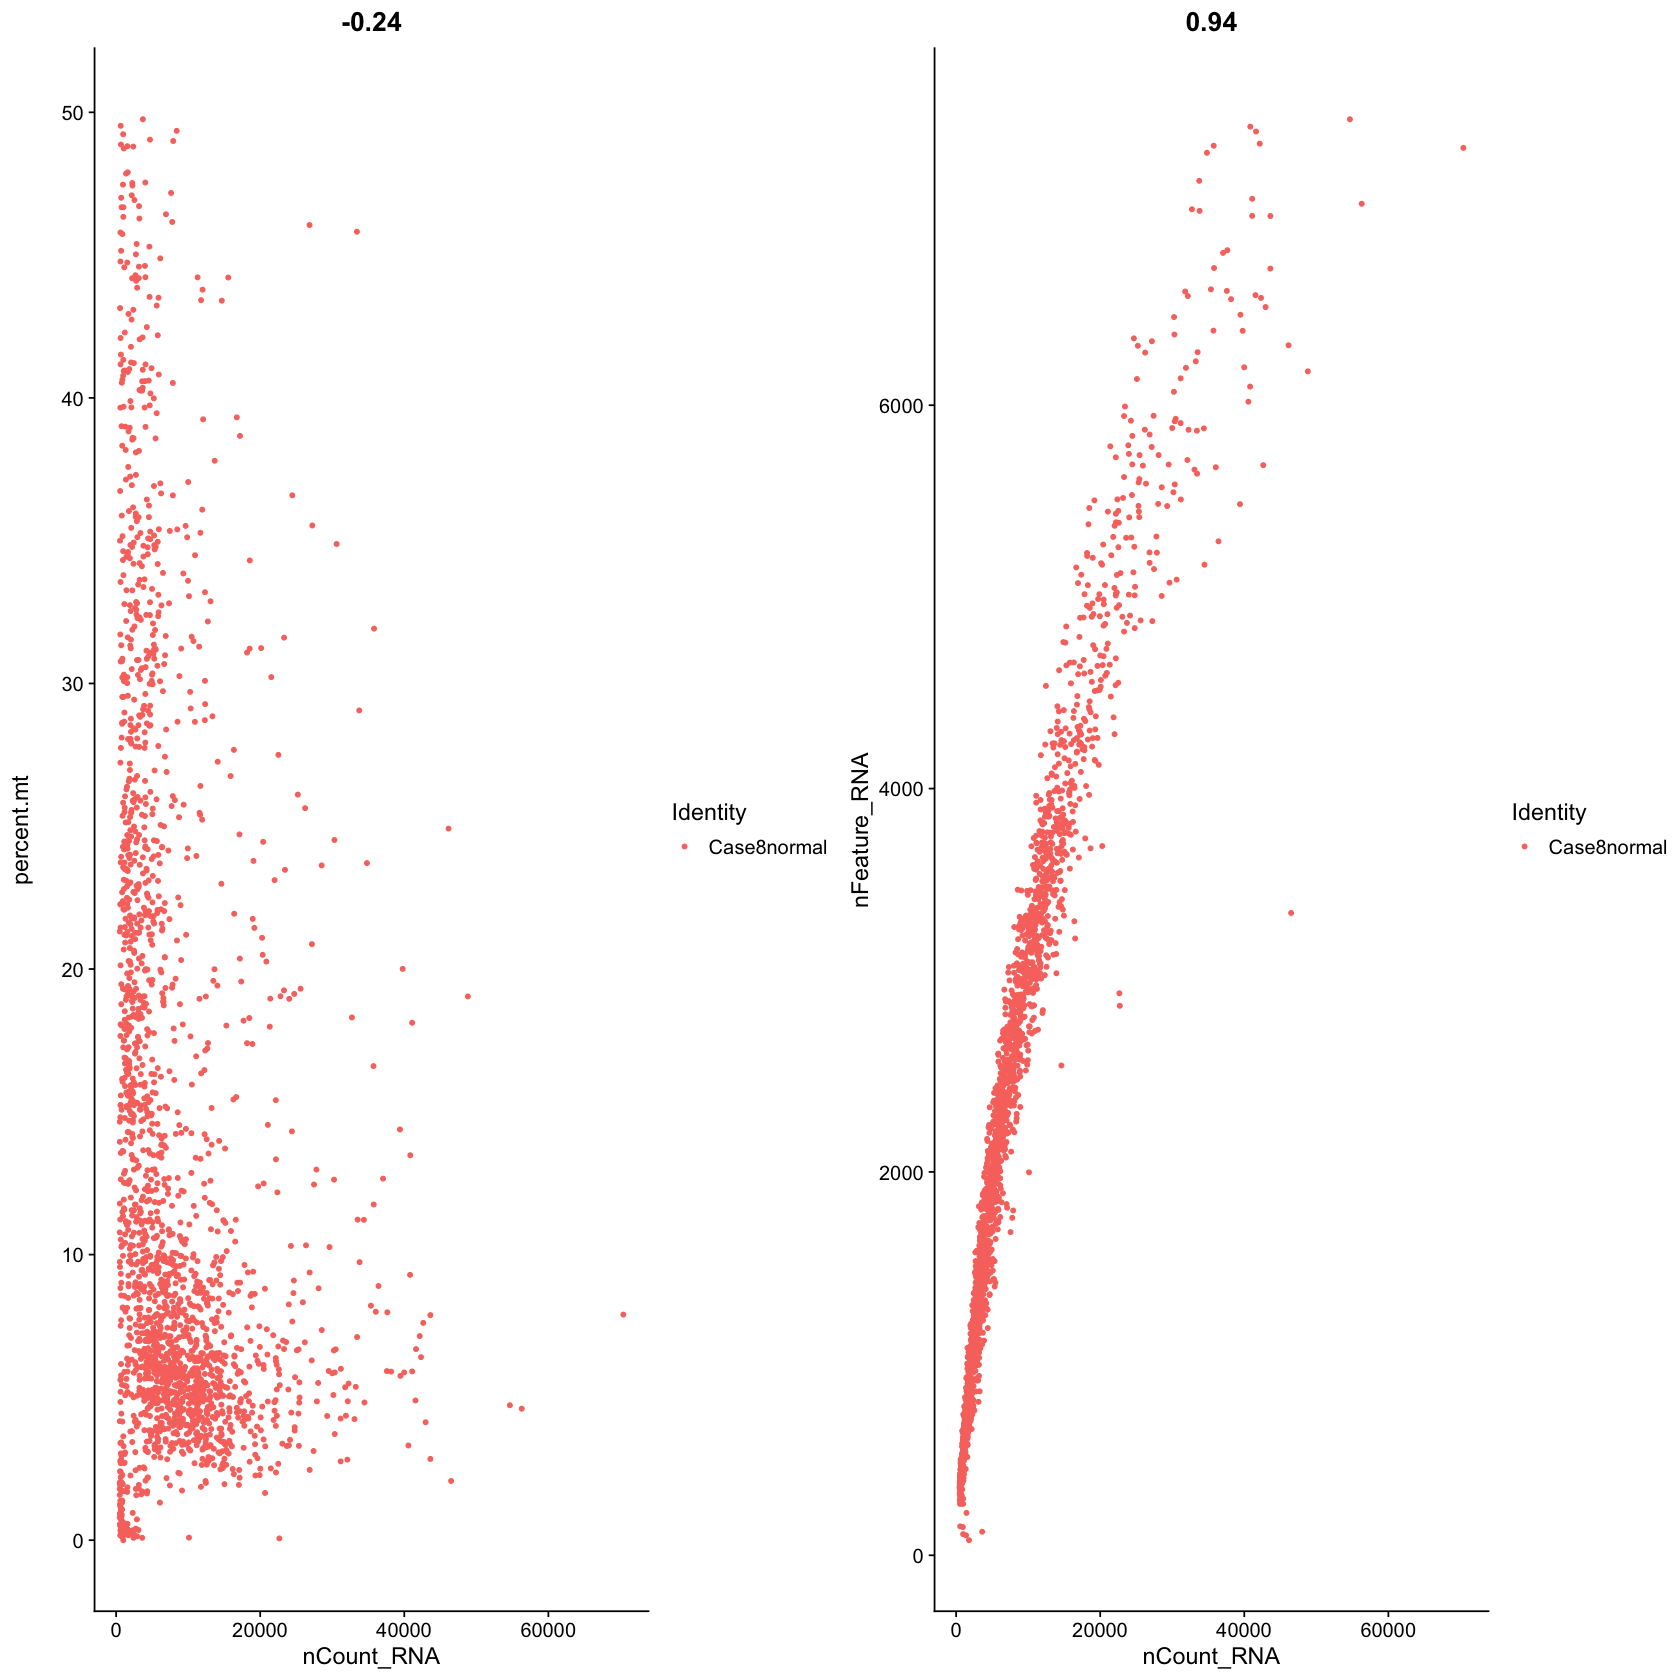

In [19]:
tmp <- subset(tmp, subset = nFeature_RNA > arg05 & nFeature_RNA < arg06 & nCount_RNA > arg07 & nCount_RNA < arg08 & percent.mt < arg09)
print(tmp)
VlnPlot(tmp, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

plot1 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”
When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


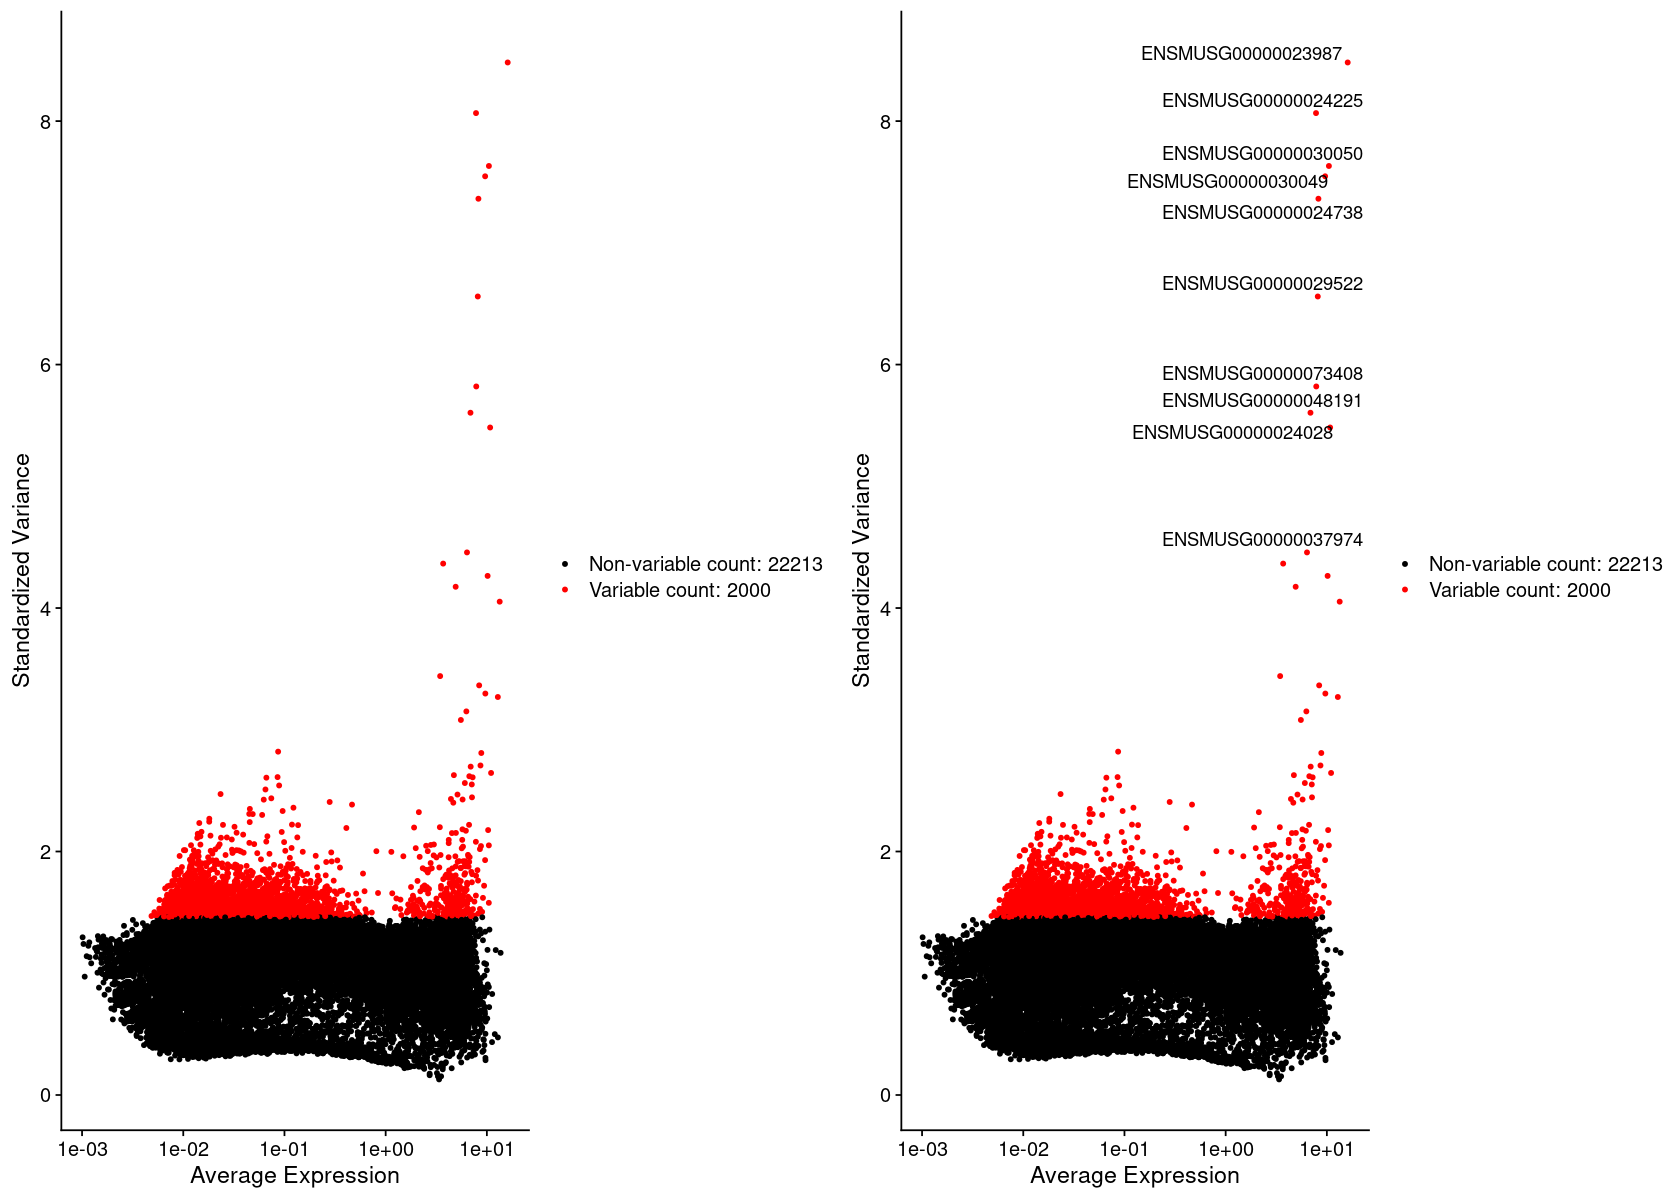

In [6]:
tmp <- NormalizeData(tmp, normalization.method = "LogNormalize", scale.factor = 10000)
tmp <- FindVariableFeatures(tmp, selection.method = "vst", nfeatures = 2000)
top10 <- head(VariableFeatures(tmp), 10)

plot1 <- VariableFeaturePlot(tmp)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
options(repr.plot.width=14)
CombinePlots(plots = list(plot1, plot2))

Centering and scaling data matrix

PC_ 1 
Positive:  ENSMUSG00000040204, ENSMUSG00000090356, ENSMUSG00000012187, ENSMUSG00000028873, ENSMUSG00000029910, ENSMUSG00000023015, ENSMUSG00000004038, ENSMUSG00000001403, ENSMUSG00000091957, ENSMUSG00000029322 
	   ENSMUSG00000023505, ENSMUSG00000027715, ENSMUSG00000032418, ENSMUSG00000031004, ENSMUSG00000017716, ENSMUSG00000022033, ENSMUSG00000054717, ENSMUSG00000025574, ENSMUSG00000032902, ENSMUSG00000035683 
	   ENSMUSG00000041431, ENSMUSG00000027469, ENSMUSG00000022322, ENSMUSG00000020914, ENSMUSG00000012443, ENSMUSG00000074445, ENSMUSG00000040084, ENSMUSG00000032254, ENSMUSG00000030677, ENSMUSG00000019942 
Negative:  ENSMUSG00000023987, ENSMUSG00000024225, ENSMUSG00000024682, ENSMUSG00000029522, ENSMUSG00000106106, ENSMUSG00000054106, ENSMUSG00000058952, ENSMUSG00000022037, ENSMUSG00000030530, ENSMUSG00000024738 
	   ENSMUSG00000032083, ENSMUSG00000046213, ENSMUSG00000040412, ENSMUSG00000025091, ENSMUSG00000029193, ENSMUSG00000066705, ENSM

PC_ 1 
Positive:  ENSMUSG00000040204, ENSMUSG00000090356, ENSMUSG00000012187, ENSMUSG00000028873, ENSMUSG00000029910 
Negative:  ENSMUSG00000023987, ENSMUSG00000024225, ENSMUSG00000024682, ENSMUSG00000029522, ENSMUSG00000106106 
PC_ 2 
Positive:  ENSMUSG00000021749, ENSMUSG00000020581, ENSMUSG00000004552, ENSMUSG00000025068, ENSMUSG00000024028 
Negative:  ENSMUSG00000044156, ENSMUSG00000028777, ENSMUSG00000003283, ENSMUSG00000032015, ENSMUSG00000030263 
PC_ 3 
Positive:  ENSMUSG00000048327, ENSMUSG00000020897, ENSMUSG00000022322, ENSMUSG00000030677, ENSMUSG00000027469 
Negative:  ENSMUSG00000021250, ENSMUSG00000029322, ENSMUSG00000052837, ENSMUSG00000000078, ENSMUSG00000040435 
PC_ 4 
Positive:  ENSMUSG00000024032, ENSMUSG00000030050, ENSMUSG00000022598, ENSMUSG00000030049, ENSMUSG00000037974 
Negative:  ENSMUSG00000048191, ENSMUSG00000027938, ENSMUSG00000037994, ENSMUSG00000005360, ENSMUSG00000037953 
PC_ 5 
Positive:  ENSMUSG00000047777, ENSMUSG00000015312, ENSMUSG00000035828, ENSMUS

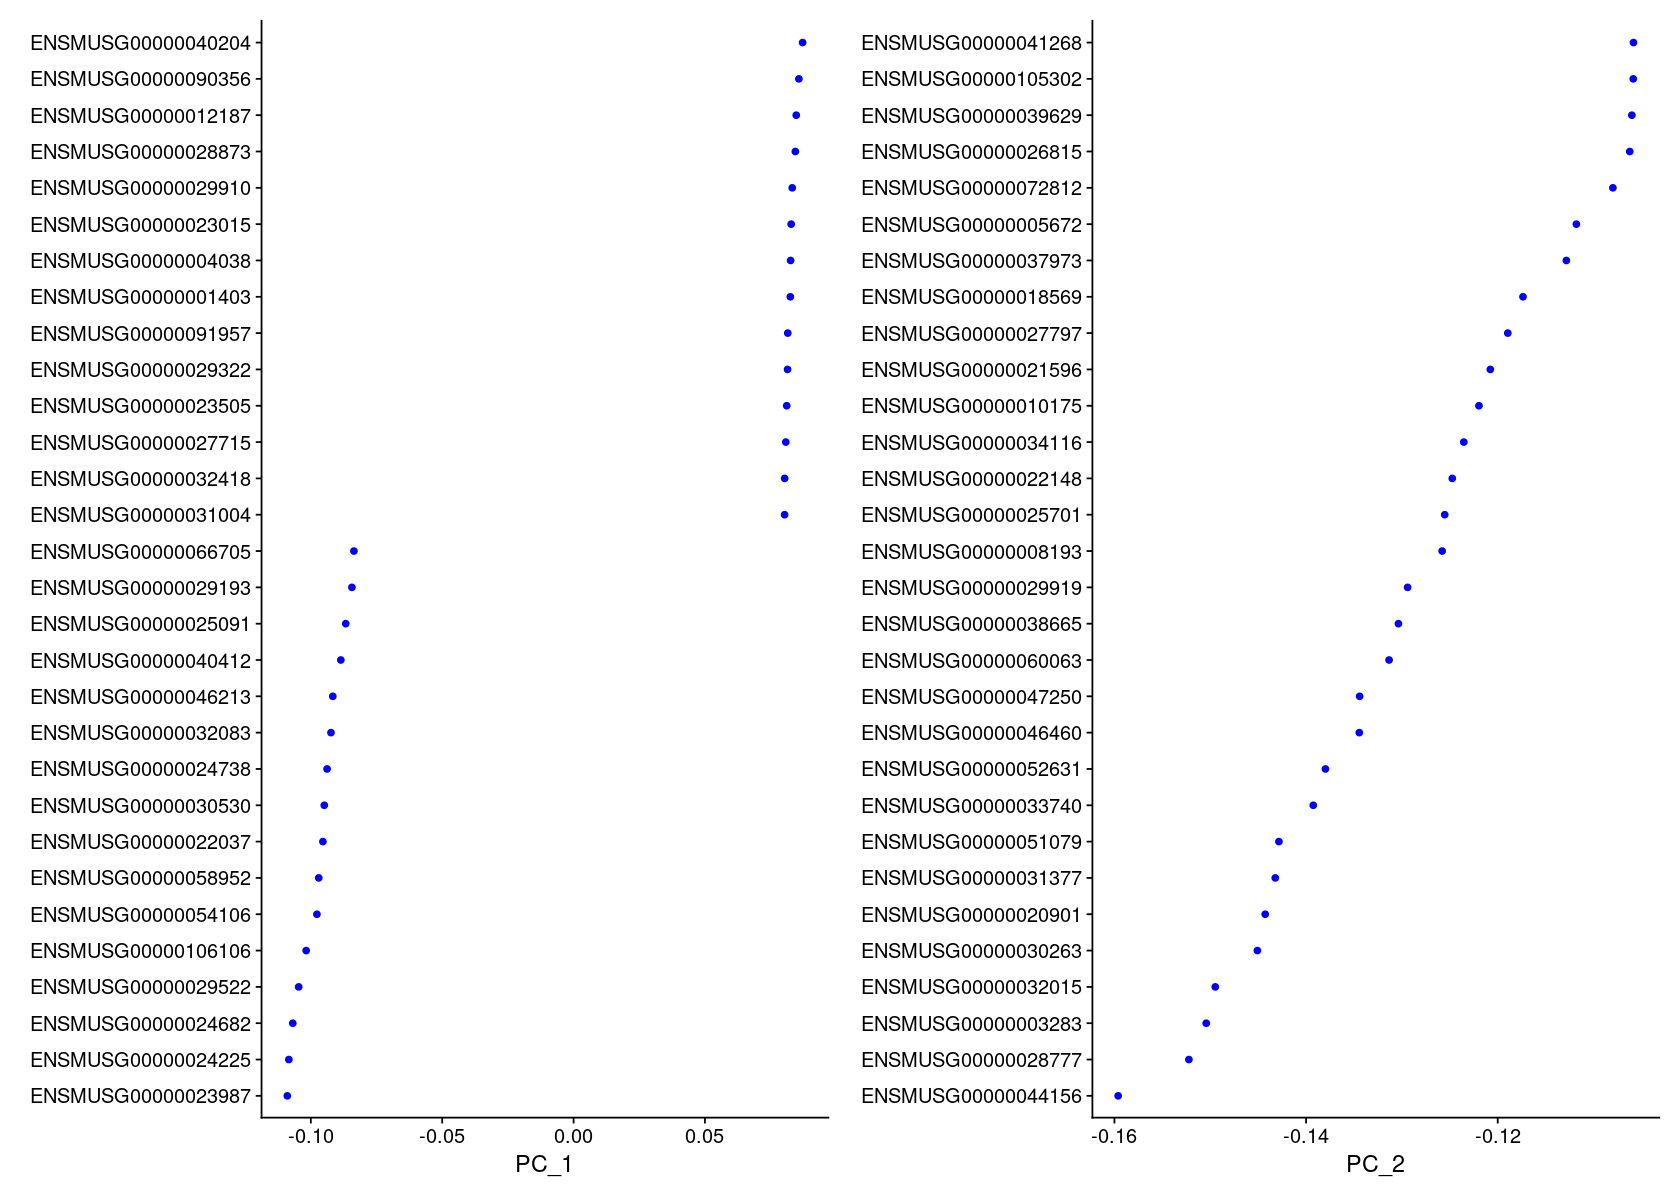

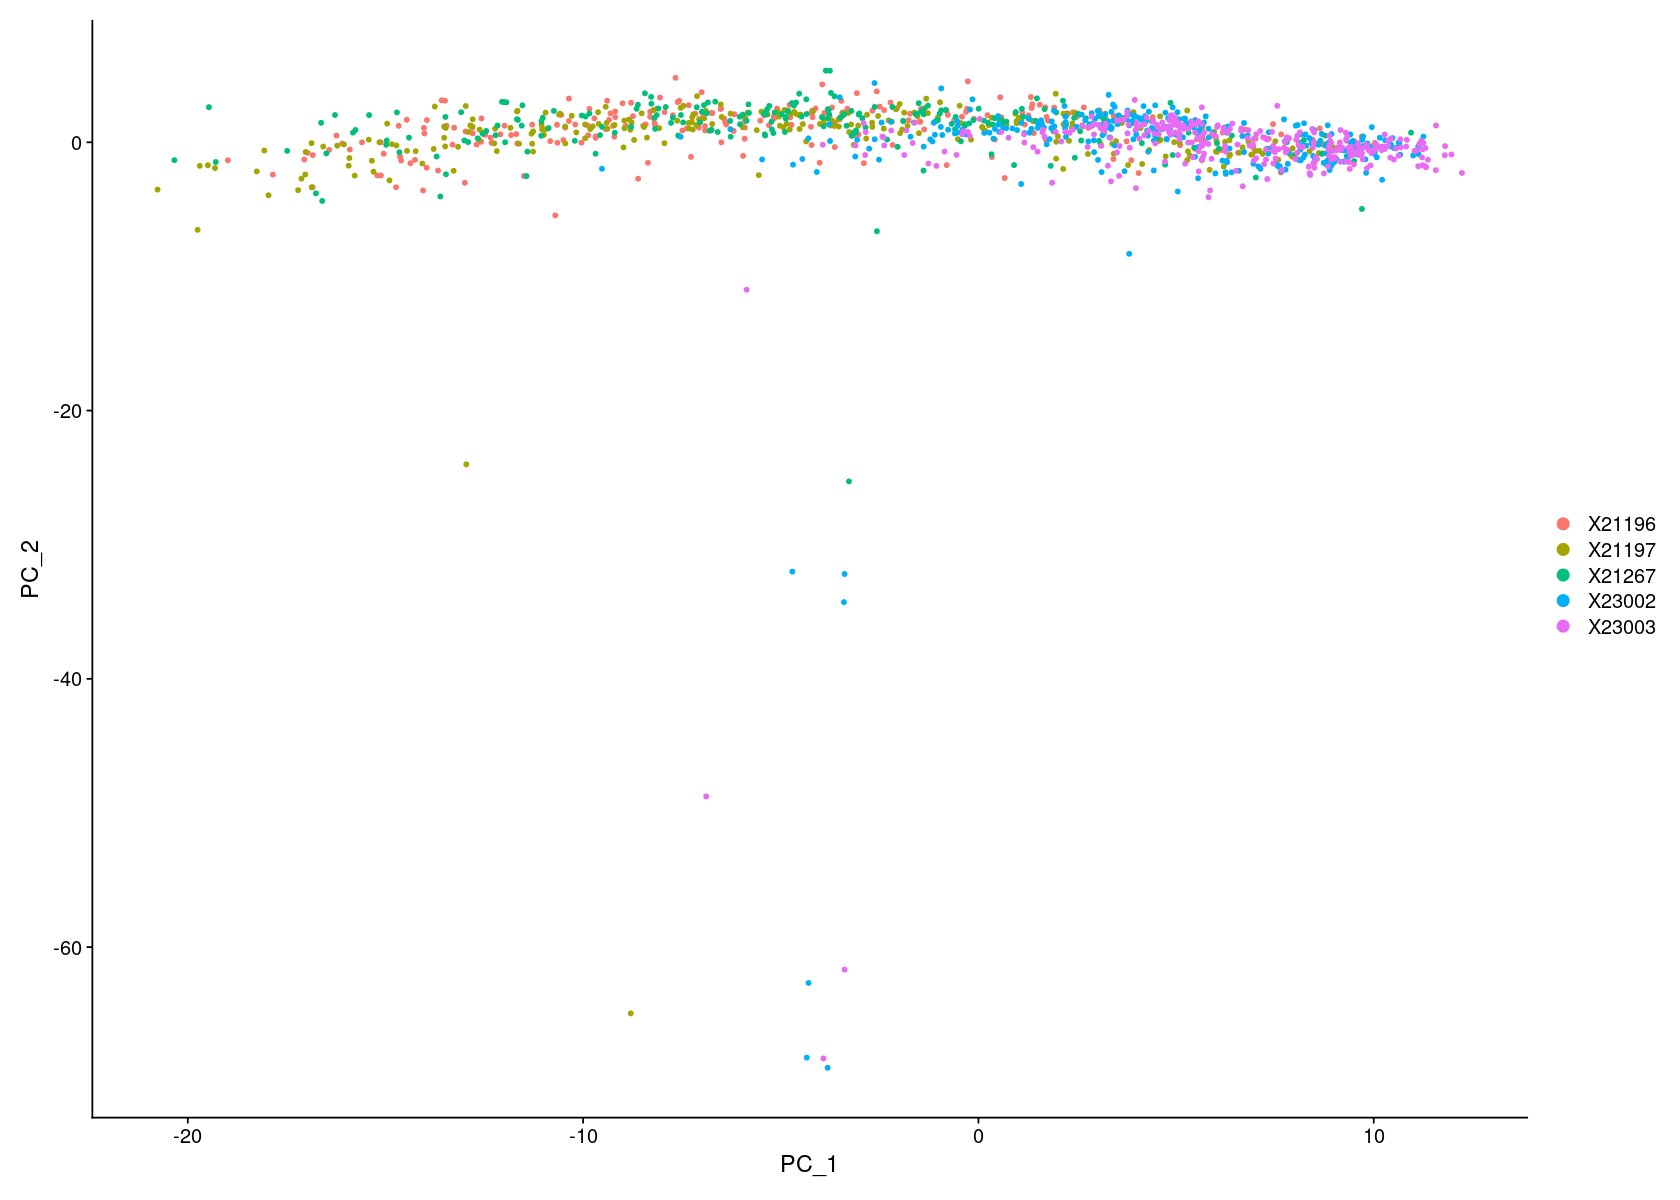

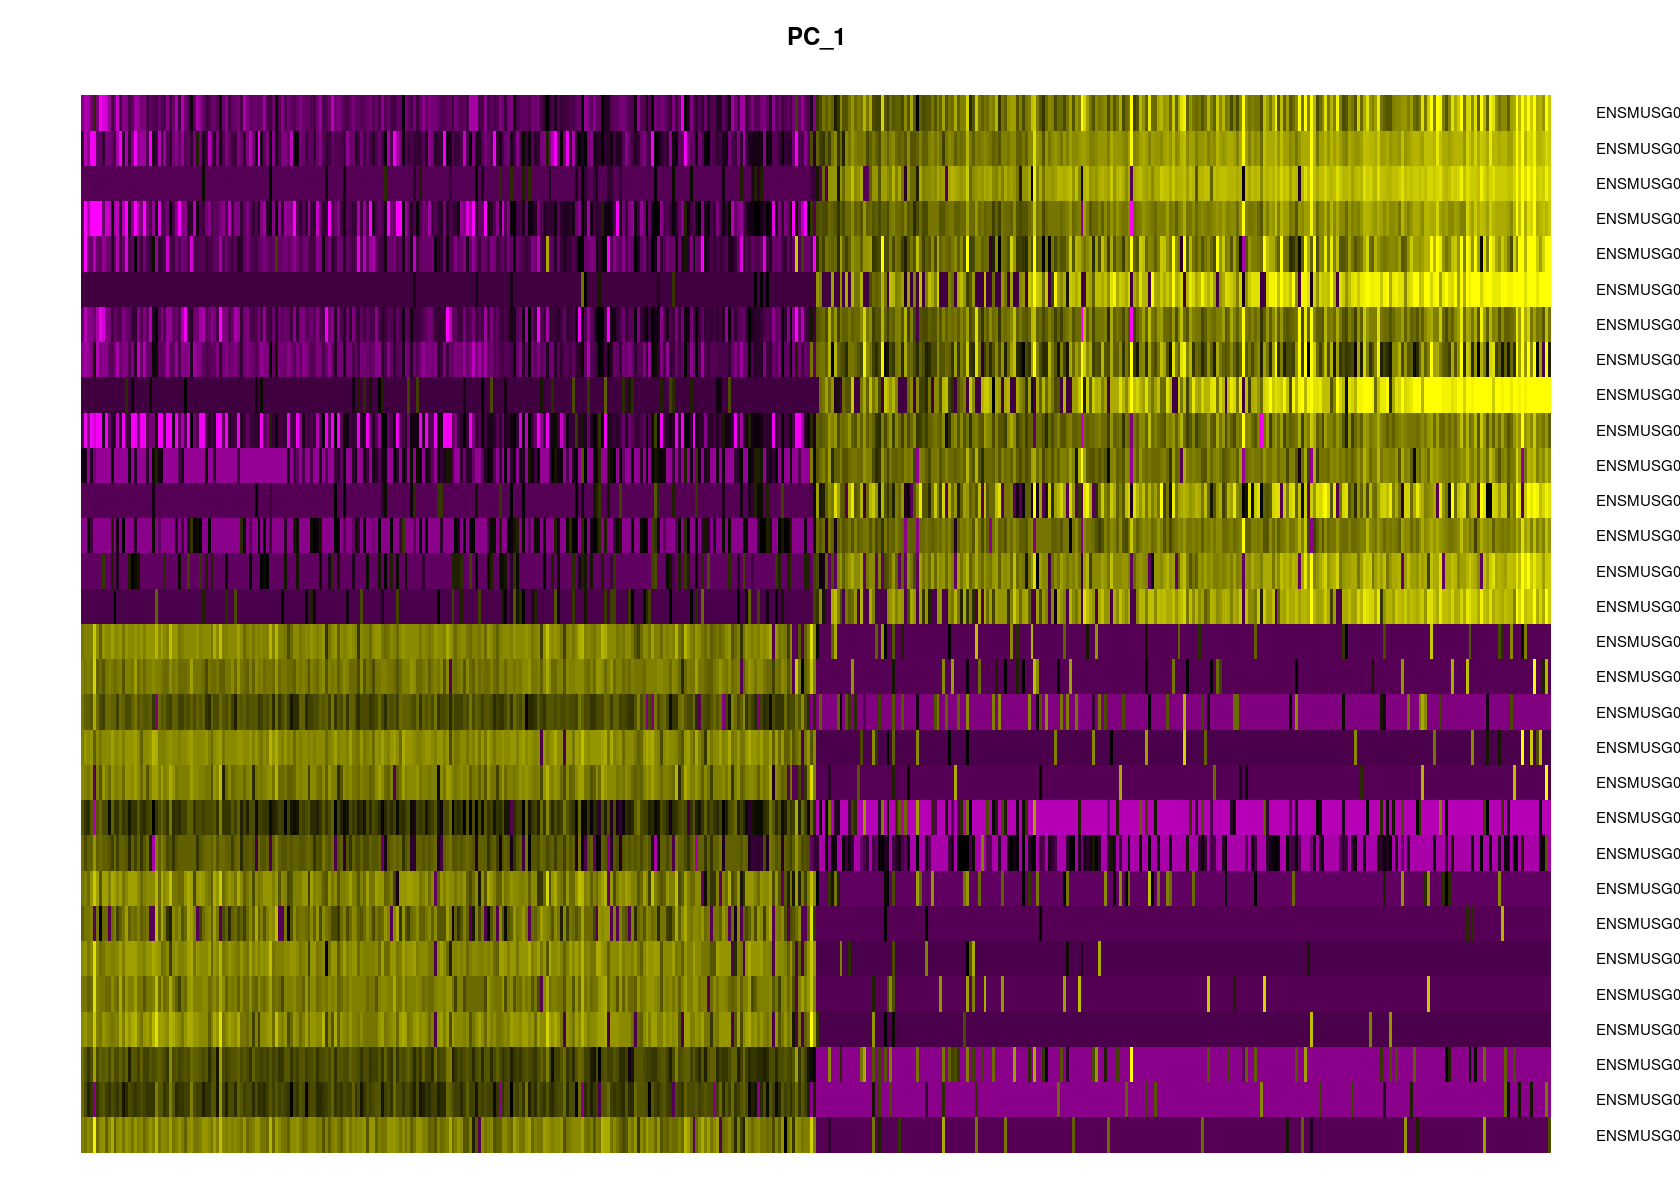

In [7]:
all.genes <- rownames(tmp)
tmp <- ScaleData(tmp, features=all.genes)

tmp <- RunPCA(tmp, features = VariableFeatures(object = tmp))
print(tmp[["pca"]], dims=1:5, nfeatures=5)

VizDimLoadings(tmp, dims=1:2, reduction="pca")

DimPlot(tmp, reduction="pca")

DimHeatmap(tmp, dims=1, cells=500, balanced=TRUE)

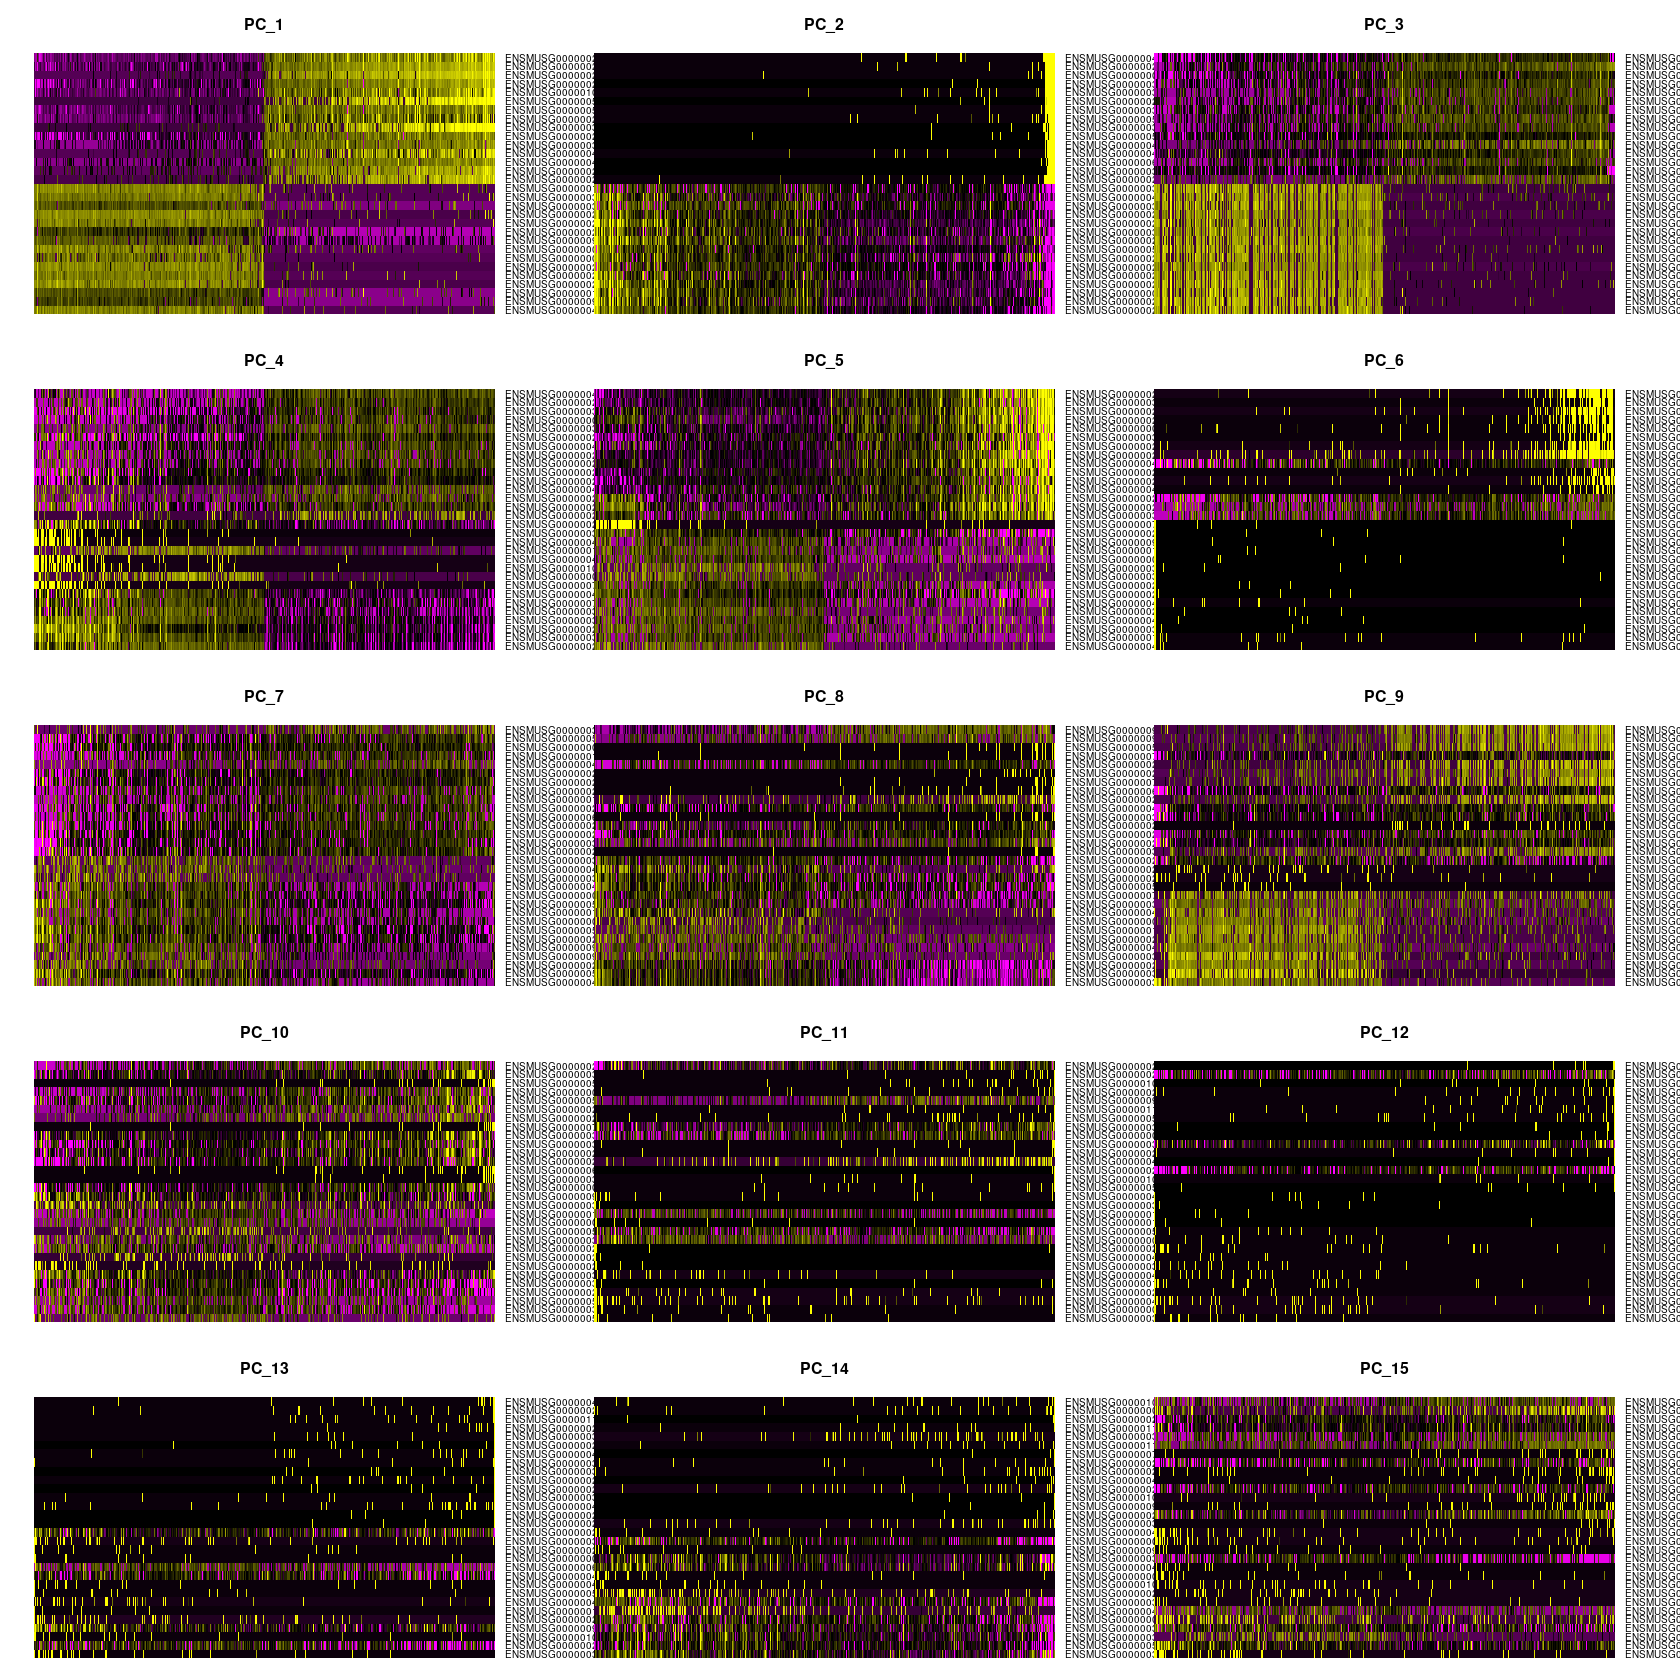

In [8]:
options(repr.plot.width=14, repr.plot.height=14)
DimHeatmap(tmp, dims=1:15, cells=500, balanced=TRUE)

Warning message:
“Removed 30393 rows containing missing values (geom_point).”


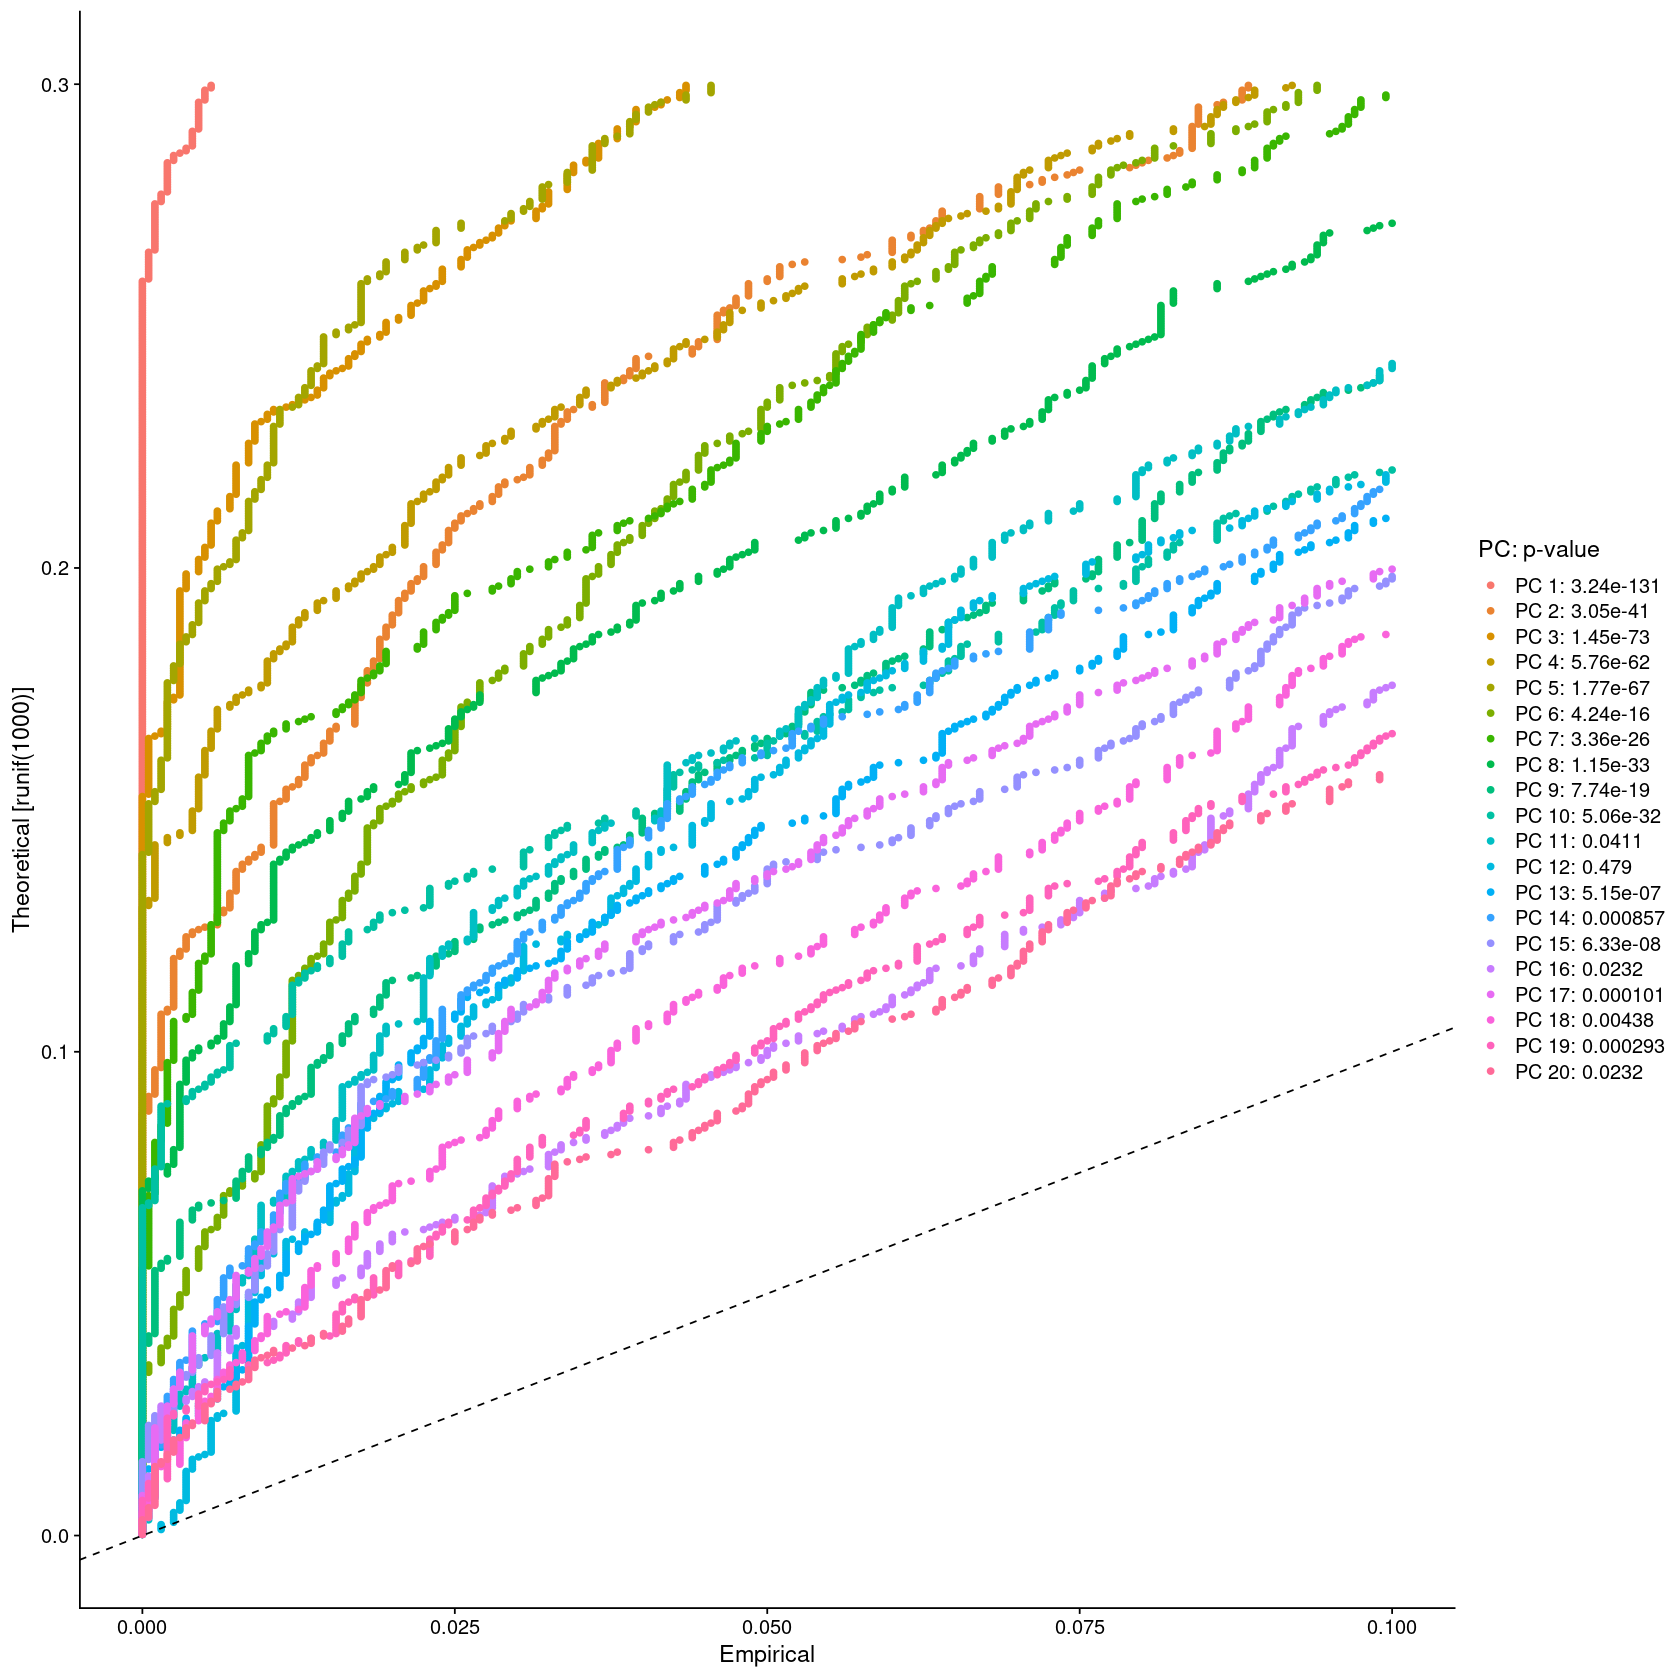

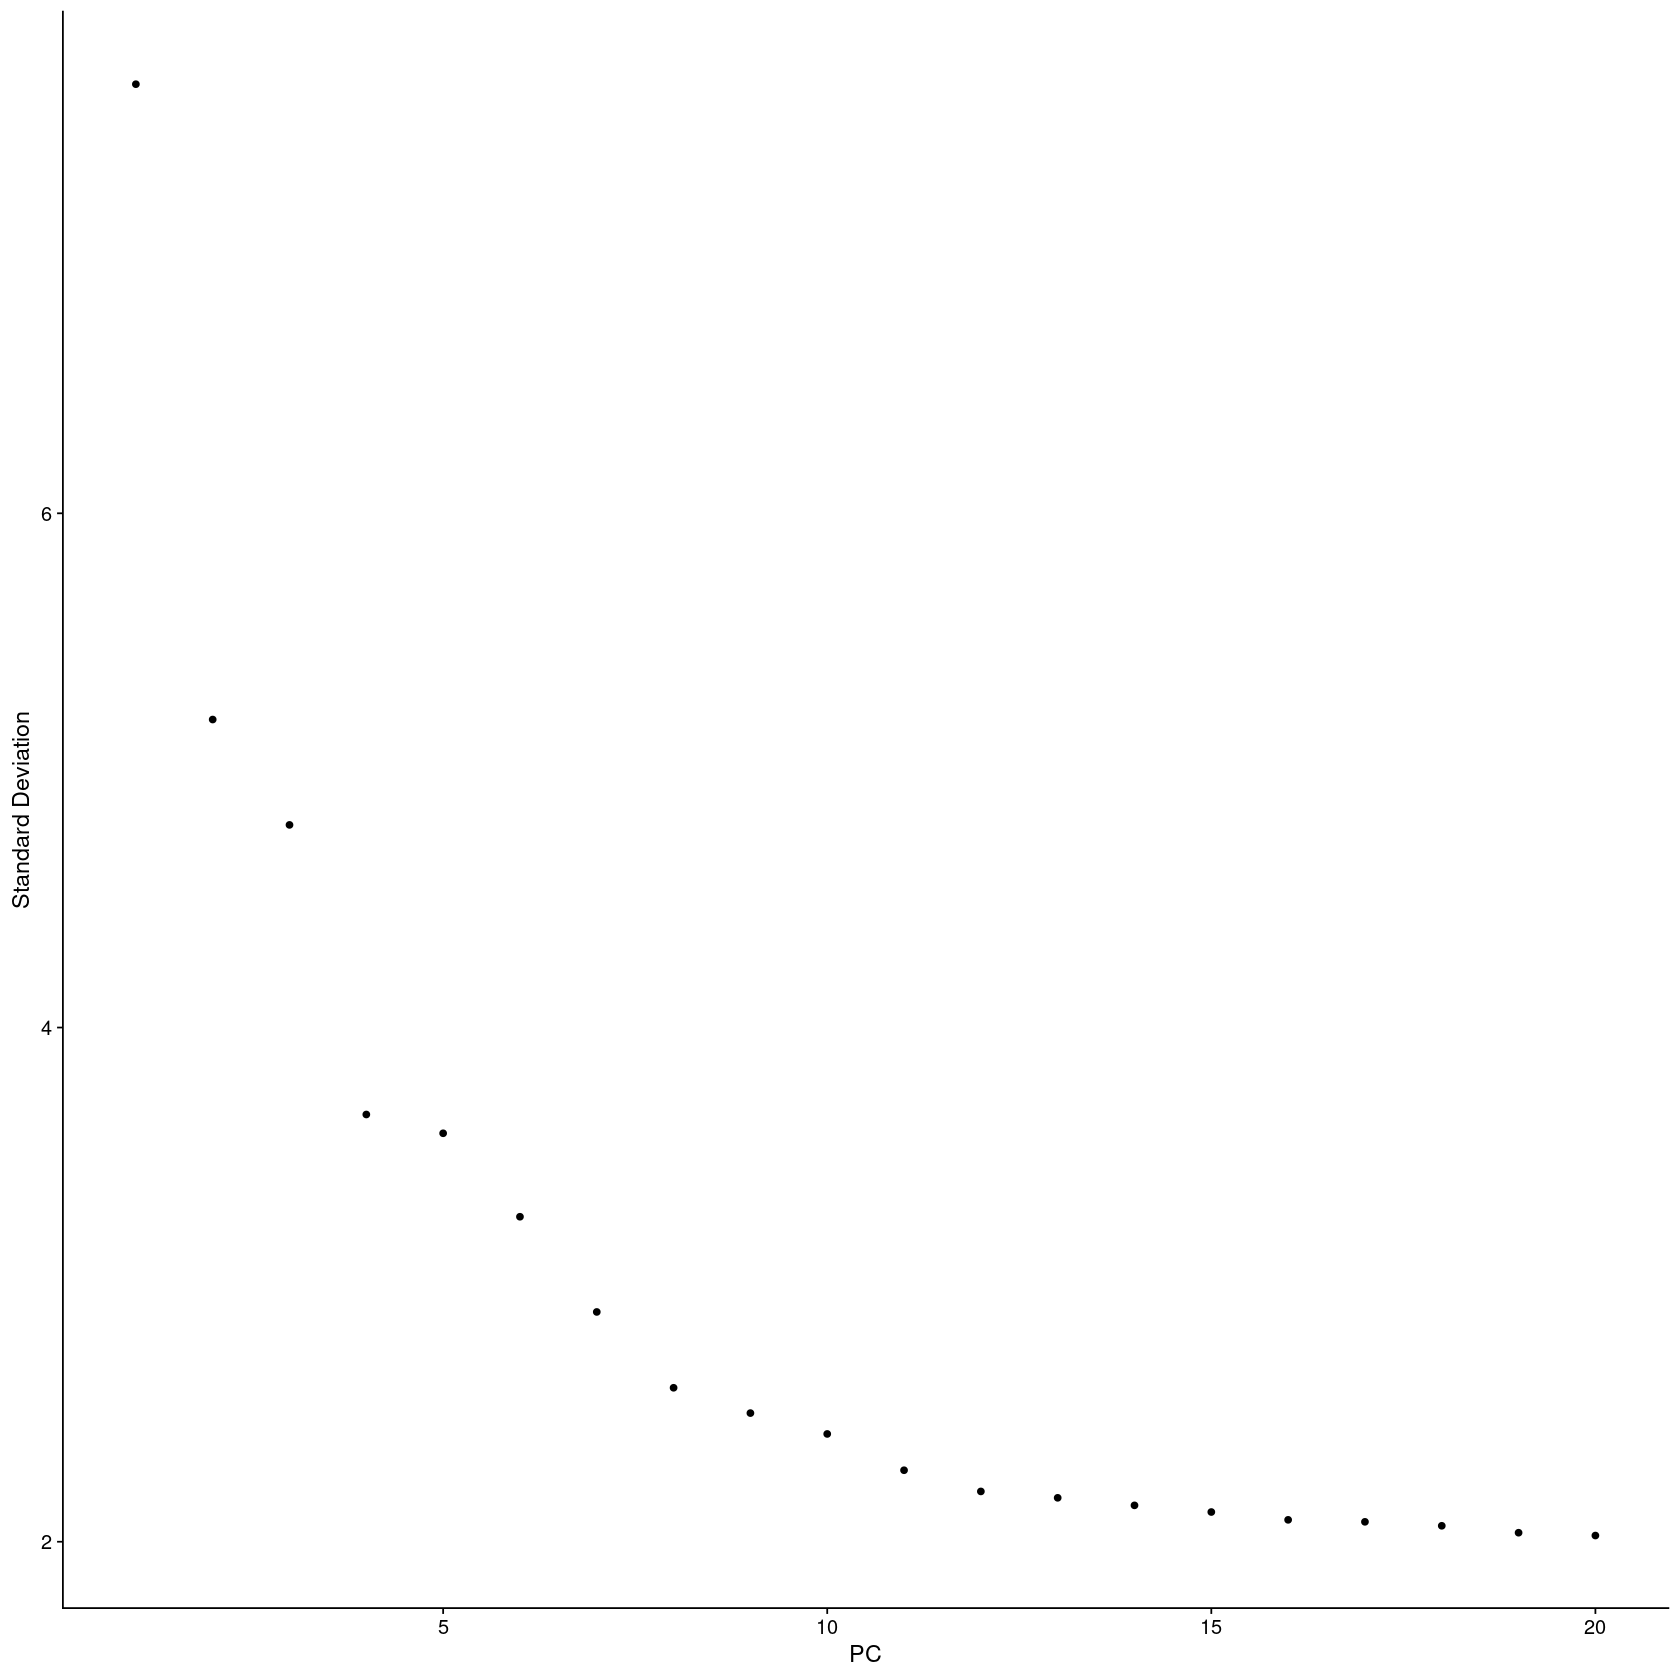

In [9]:
tmp <- JackStraw(tmp, num.replicate=100)
tmp <- ScoreJackStraw(tmp, dims=1:20)

JackStrawPlot(tmp, dims=1:20)

ElbowPlot(tmp)

In [10]:
arg10 <- 20 #maximum PC

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1353
Number of edges: 53452

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7546
Number of communities: 7
Elapsed time: 1 seconds


X21196_2 X21196_3 X21196_5 X21196_6 X21196_8 
       0        6        0        0        3 
Levels: 0 1 2 3 4 5 6

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
23:11:30 UMAP embedding parameters a = 0.9922 b = 1.112

23:11:30 Read 1353 rows and found 20 numeric columns

23:11:30 Using Annoy for neighbor search, n_neighbors = 30

23:11:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

23:11:31 Writing NN index file to temp file /tmp/Rtmp6LcbTM/file7bae4f7c4783

23:11:31 Searching Annoy index using 1 thread, search_k = 3000

23:11:33 Annoy recall = 100%

23:11:33 Commencing smooth kNN distance calibration using 1 thread

23:11:34 Initializing fr

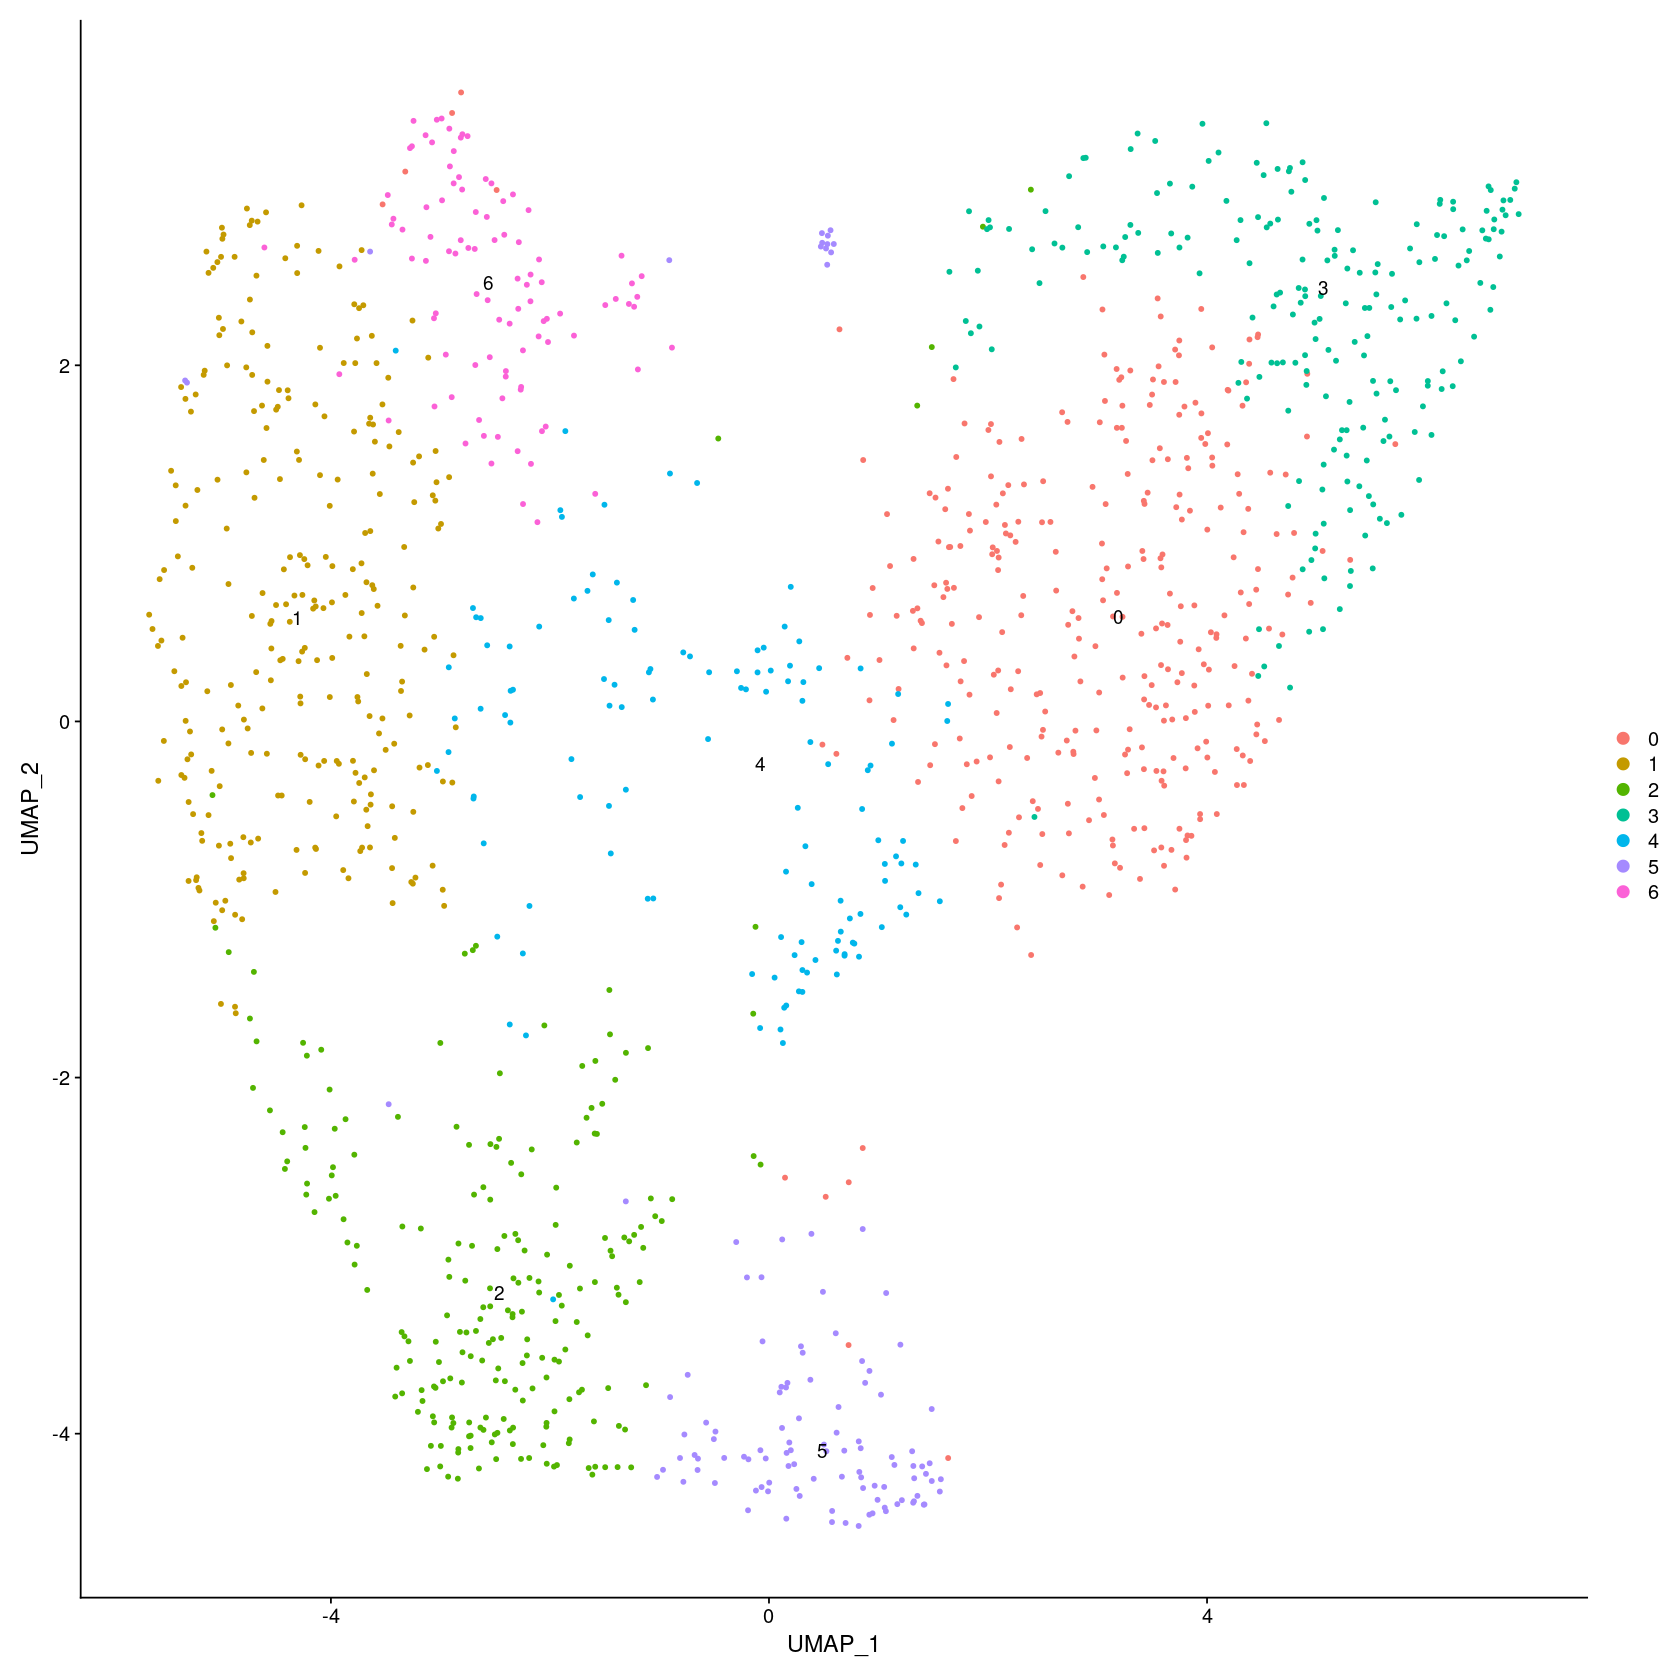

In [11]:
tmp <- FindNeighbors(tmp, dims=1:arg10)
tmp <- FindClusters(tmp, resolution=0.8)

head(Idents(tmp), 5)

tmp <- RunUMAP(tmp, dims=1:arg10)
DimPlot(tmp, reduction="umap", label=TRUE)

In [12]:
sample.markers <- FindAllMarkers(tmp, min.pct = 0.25, logfc.threshold = 0.25)
sample.markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_logFC)
markers10 <- sample.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6



p_val         avg_logFC pct.1 pct.2 p_val_adj     cluster gene              
1   2.525954e-60 0.5613667 0.705 0.234  6.116091e-56 0       ENSMUSG00000053093
2   2.891726e-50 0.5169198 0.789 0.413  7.001736e-46 0       ENSMUSG00000044694
3  2.874839e-123 0.8320048 0.993 0.256 6.960848e-119 1       ENSMUSG00000027715
4  1.345085e-117 0.8160061 0.925 0.195 3.256853e-113 1       ENSMUSG00000041431
5   3.225473e-69 0.6687735 0.781 0.228  7.809837e-65 2       ENSMUSG00000056293
6   9.254599e-55 0.6275749 0.607 0.160  2.240816e-50 2       ENSMUSG00000024810
7  1.288754e-108 1.2616233 0.852 0.214 3.120461e-104 3       ENSMUSG00000054106
8   2.362464e-97 1.3599632 0.938 0.430  5.720234e-93 3       ENSMUSG00000024682
9   7.400554e-30 0.5110937 0.616 0.196  1.791896e-25 4       ENSMUSG00000006585
10  7.669206e-24 0.4764771 0.704 0.336  1.856945e-19 4       ENSMUSG00000022673
11  6.832351e-24 0.4174121 0.956 0.638  1.654317e-19 5       ENSMUSG00000090877
12  1.143618e-18 0.4031542 0.439 0.132  2.769043e-14 5       ENSMUSG00000098132
13  3.074569e-62 0.8303820 0.969 0.270  7.444454e-58 6       ENSMUSG00000030677
14  1.014448e-59 0.8093133 0.917 0.244  2.456282e-55 6       ENSMUSG00000020897

In [13]:
write.table(sample.markers, file=paste(arg03,'_all_markers.tsv',sep=''), sep='\t', na='', row.names=T, col.names=NA, quote=F)
write.table(markers10, file=paste(arg03,'_top10_markers.tsv',sep=''), sep='\t', na='', row.names=T, col.names=NA, quote=F)

In [15]:
saveRDS(tmp, file=arg04)

In [ ]:
#sample <- readRDS(file=args04)

In [ ]:
#From CellMarker
#cancer_marker <- list('CD44', 'CD22', 'SOX2', 'EPCAM')
#, 'ALDH1', 'CD133', 'ESA'
#for (i in cancer_marker){
#   p1 <- FeaturePlot(sample, features = i)
#    p2 <- VlnPlot(sample, features = i)
#    print(CombinePlots(plots = list(p1, p2)))
#}

In [ ]:
#From Dr.Nagasawa slide
#cancer_marker <- list('VIM', 'CD22', 'SOX2', 'EPCAM')
#, 'ALDH1', 'CD133', 'ESA'
#for (i in cancer_marker){
#    p1 <- FeaturePlot(sample, features = i)
#    p2 <- VlnPlot(sample, features = i)
#    print(CombinePlots(plots = list(p1, p2)))
#}